# SAFT-VR-Mie with polar contributions

In [1]:
import teqp
teqp.__version__

'0.18.0'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

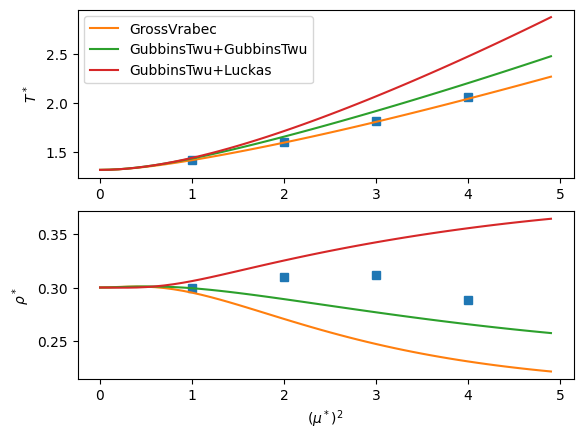

In [3]:
ek = 100 # [K]
sigma_m = 3e-10
                     
N_A = 6.022e23
fig, (ax1, ax2) = plt.subplots(2, 1)

# # From https://arxiv.org/pdf/mtrl-th/9501001.pdf which pulled from M. van Leeuwen and B. Smit, Phys. Rev. Lett. 71, 3991 (1993)
# These data need to be rescaled according to Hentschke et al. (DOI: https://doi.org/10.1103/physreve.75.011506)
# mustar2 = [2.5, 3.0, 3.5, 4.0]
# T = [2.63, 3.35, 4.20, 5.07]
# rho = [0.29, 0.25, 0.24, 0.24]
# ax1.plot(mustar2, T, 'd')
# ax2.plot(mustar2, rho, 'd')

# Comparing with Hentschke, DOI: https://doi.org/10.1103/physreve.75.011506
mustar2 = [1, 2, 3, 4]
T = [1.41, 1.60, 1.82, 2.06]
rho = [0.30, 0.31, 0.312, 0.289]
ax1.plot(mustar2, T, 's')
ax2.plot(mustar2, rho, 's')

kB = 1.380649e-23 # Boltzmann's constant, J/K
epsilon_0 = 8.8541878128e-12 # Vacuum permittivity

for polar_model in ['GrossVrabec','GubbinsTwu+GubbinsTwu','GubbinsTwu+Luckas']:
    
    x = []; y = []; TT = []; DD = []
    rhostar_guess = 0.27
    Tstar_guess = 1.5
    for mustar2 in np.arange(0.001, 5, 0.1):
        z = np.array([1.0])
        mu2_C2m2 = 4.0*np.pi*epsilon_0*sigma_m**3*ek*kB*mustar2
        mu_Cm = mu2_C2m2**0.5
        model = teqp.make_model({
            "kind": 'SAFT-VR-Mie',
            "model": {
                "polar_model": polar_model,
                "coeffs": [{
                    "name": "Stockmayer",
                    "BibTeXKey": "me",
                    "m": 1.0,
                    "epsilon_over_k": ek, # [K]
                    "sigma_m": sigma_m,
                    "lambda_r": 12.0,
                    "lambda_a": 6.0,
                    "mu_Cm": mu_Cm,
                    "nmu": 1.0
                }]
            }
        })

        T, rho = model.solve_pure_critical(Tstar_guess*ek, rhostar_guess/(N_A*sigma_m**3))
        # Store the values
        x.append(mustar2)
        TT.append(T/ek)
        DD.append(rho*N_A*sigma_m**3)
        # Update the guess for the next calculation
        Tstar_guess = TT[-1]
        rhostar_guess = DD[-1]

    ax1.plot(x, TT, label=polar_model)
    ax2.plot(x, DD)
        
ax1.legend(loc='best')
ax1.set(ylabel=r'$T^*$')
ax2.set(ylabel=r'$\rho^*$', xlabel=r'$(\mu^*)^2$')
plt.show()